In [1]:
# Let's look at what else can be done with the data from Part 1. We start with the csv import
# mentioned in Part 2. Looking at the data we see that we have data available for 2010 
# and 2015 years, and we can analyze the change in suicide rates. 

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
table = pd.read_excel('mergedData.xlsx')
table.head()

,Country,2015_s,2010_s,2015_p,2013_p,2010_p,2013_d,suiAve,suiPerDeath,deaPerPop
0,Afghanistan,5.5,5.2,32526.6,30682.5,27962.2,7.7,5.35,0.694805,0.77
1,Albania,4.3,5.3,2896.7,2883.3,2901.9,9.4,4.80,0.510638,0.94
2,Algeria,3.1,3.4,39666.5,38186.1,36036.2,5.7,3.25,0.570175,0.57
3,Angola,20.5,20.7,25022.0,23448.2,21220.0,13.9,20.60,1.482014,1.39
4,Antigua and Barbuda,0.0,0.2,91.8,90.0,87.2,6.8,0.10,0.014706,0.68


In [3]:
# As in the previous example we create needed variables.

x = table.index
y1= table['2015_s']
y2= table['2010_s']
size = table['deaPerPop']
xLabels = table['Country']

# xMax and yMax are created to set the axes maximums.
xMax = x.max() + 1
yMax = max(y1.max(), y2.max()) + 1
lightBlack = '#3e3e3e'

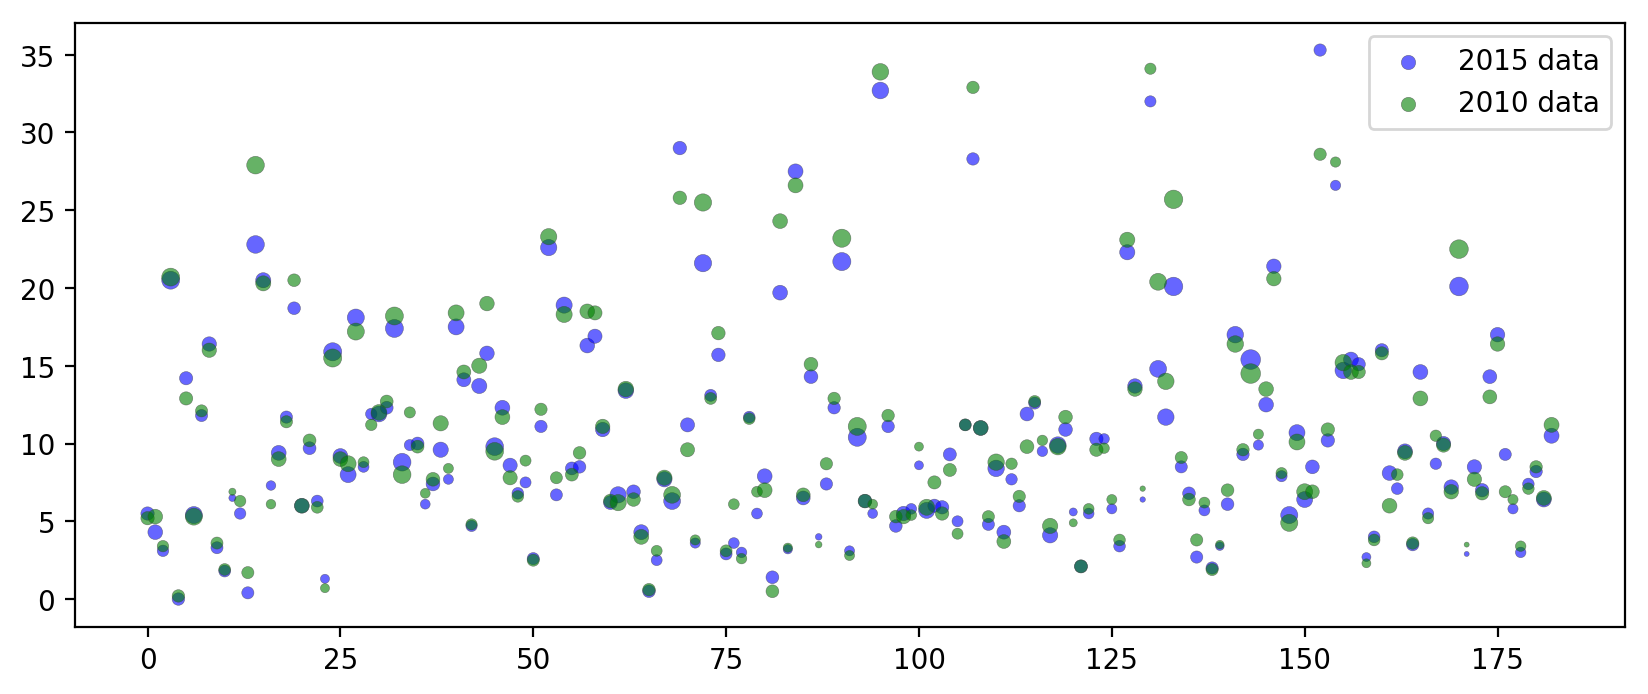

In [4]:
# Next step is to create a scatter plot from two sets of data. In some cases the dots are
# apart from each other, while in the other they are overlapping. Some countries have bigger
# change in suicide rates.

fig, ax = plt.subplots(figsize=(10, 4), dpi=200, facecolor='white')

im = ax.scatter(x, y1, s=size * 30, c='b', alpha=0.6, 
                linewidth='0.2', edgecolor=lightBlack, label='2015 data')
ik = ax.scatter(x, y2, s=size * 30, c='g', alpha=0.6, 
                linewidth='0.2', edgecolor=lightBlack, label='2010 data')
plt.legend();


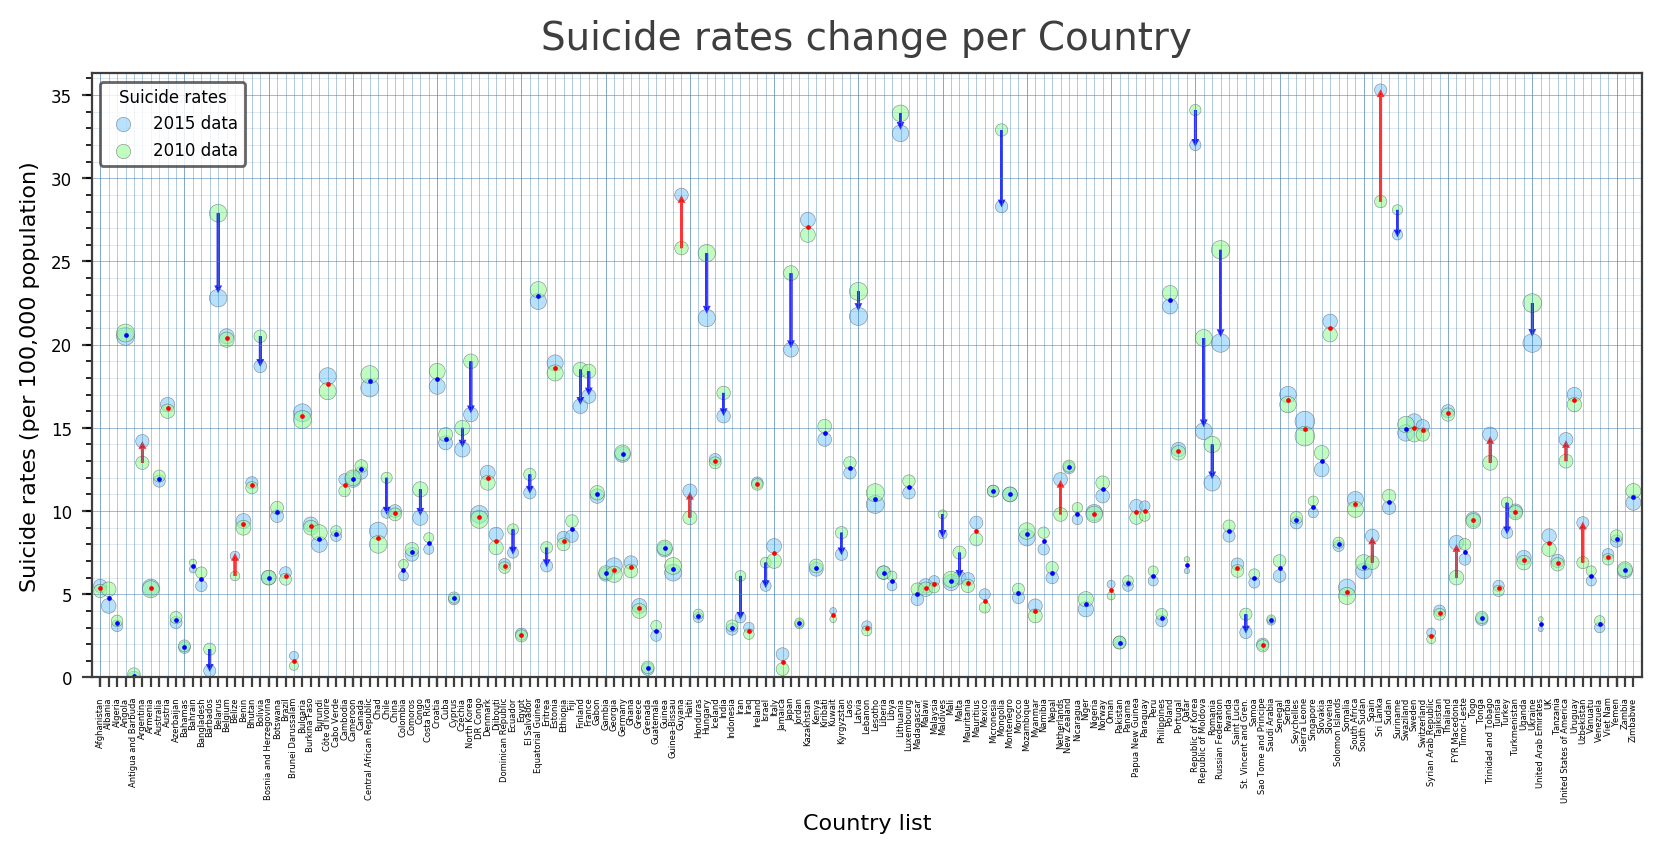

In [5]:
# We can indicate the change in rates with the arrows pointing from low to high, and assign
# colors to those arrows - blue for reduced rates, red for increased rates. To do that we are going
# to use for loop, and couple if statements. Some changes in suicide rates are minimal (as shown in 
# the above plot, and the circles are close to each other to be able to plot arrows on them.
# In that case we are going to draw dots on the plot.

fig, ax = plt.subplots(figsize=(10, 4), dpi=200, facecolor='white')

im = ax.scatter(x, y1, s=size * 30, c='lightSkyBlue', alpha=0.6, 
                linewidth='0.2', edgecolor=lightBlack, label='2015 data')
ik = ax.scatter(x, y2, s=size * 30, c='paleGreen', alpha=0.6, 
                linewidth='0.2', edgecolor=lightBlack, label='2010 data')

# Looping through all the data points
for i in np.arange(0, xMax,1):
    # Checking if the abs value of difference is above 1
    if abs(y1[i] - y2[i]) > 1:
        # If 2015 rates are higher than 2010 data then add a red arrow
        if y1[i] > y2[i]:
            plt.arrow(i,y2[i], 0, y1[i]-y2[i]-size[i]/2, alpha=0.8,
                      shape='full', head_width=0.4,head_length=0.2, fc='r', ec='r')
        # Else add a blue arrow
        else:
             plt.arrow(i, y2[i], 0, y1[i]-y2[i]+size[i]/2, alpha=0.8,
                       shape='full', head_width=0.4, head_length=0.2, fc='b', ec='b')
    # If the change is lower than 1 then
    else:
        # Add a red marker if suicide rates increase
        if y1[i] > y2[i]:
            plt.plot(i, (y1[i]+y2[i])/2, marker='o', markersize=0.7, color="r")
        # Add blue marker if suicide rates decreased
        else:
            plt.plot(i, (y2[i]+y1[i])/2, marker='o', markersize=0.7, color="b")

ax.text(0.5, 1.04, 'Suicide rates change per Country', horizontalalignment='center',fontsize=14,
        color=lightBlack, transform = ax.transAxes)

# Setting plot parameters asin Part 2.
ax.set(xlim=[-1,xMax], ylim=[0, yMax], xticks=x)
ax.set_xlabel('Country list', fontsize=8)
ax.set_ylabel('Suicide rates (per 100,000 population)', fontsize=8)

ax.tick_params(color=lightBlack)
ax.set_xticklabels(xLabels, rotation='vertical', size=3)
ax.yaxis.set_tick_params(labelsize=6)
ax.set_yticks(np.arange(1, yMax, 1), minor=True)

for sp in ax.get_children():
    if isinstance(sp, mpl.spines.Spine):
        sp.set_color(lightBlack)

# Adjusting colors, line parameters of the major and minor grid
minParm = dict(which='minor',color='steelblue', linestyle='-', linewidth=0.2, alpha=0.3)
ax.yaxis.grid(True, **minParm)
majParm = dict(which='major',color='steelblue', linestyle='-', linewidth=0.3, alpha=0.5)
ax.xaxis.grid(True, **majParm)
ax.yaxis.grid(True, **majParm)

# Adding extra tick lines every 10 ticks as a numpy array
extrTicks = np.arange(0, table.index.max(), 10).tolist()
plt.xticks(list(plt.xticks()[0]) + extrTicks)
        
# plot legend, with specified location, border color, and title fontsize
legend = plt.legend(loc='upper left', scatterpoints=1, frameon=True, 
           fontsize='6',labelspacing=0.5, title='Suicide rates')
legend.get_frame().set_edgecolor(lightBlack);
legend.get_title().set_fontsize('6');
